In [114]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

## scikit-learn

> Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

&nbsp;

> * Simple and efficient tools for predictive data analysis
> * Accessible to everybody, and reusable in various contexts
> * Built on NumPy, SciPy, and matplotlib
> * Open source, commercially usable - BSD license


This is one of several other "scikits" (e.g. scikit-image) which are scientific toolboxes built on top of scipy.

## Submodules

The `sklearn` package contains a large number of submodules which are specialized for different tasks / models,

.pull-left[ .small[
- `sklearn.base` - Base classes and utility functions
- `sklearn.calibration` - Probability Calibration
- `sklearn.cluster` - Clustering
- `sklearn.compose` - Composite Estimators
- `sklearn.covariance` - Covariance Estimators
- `sklearn.cross_decomposition` - Cross decomposition
- `sklearn.datasets` - Datasets
- `sklearn.decomposition` - Matrix Decomposition
- `sklearn.discriminant_analysis` - Discriminant Analysis
- `sklearn.ensemble` - Ensemble Methods
- `sklearn.exceptions` - Exceptions and warnings
- `sklearn.experimental` - Experimental
- `sklearn.feature_extraction` - Feature Extraction
- `sklearn.feature_selection` - Feature Selection
- `sklearn.gaussian_process` - Gaussian Processes
- `sklearn.impute` - Impute
- `sklearn.inspection` - Inspection
- `sklearn.isotonic` - Isotonic regression
- `sklearn.kernel_approximation` - Kernel Approximation
] ]

.pull-right[ .small[
- `sklearn.kernel_ridge` - Kernel Ridge Regression
- `sklearn.linear_model` - Linear Models
- `sklearn.manifold` - Manifold Learning
- `sklearn.metrics` - Metrics
- `sklearn.mixture` - Gaussian Mixture Models
- `sklearn.model_selection` - Model Selection
- `sklearn.multiclass` - Multiclass classification
- `sklearn.multioutput` - Multioutput regression and classification
- `sklearn.naive_bayes` - Naive Bayes
- `sklearn.neighbors` - Nearest Neighbors
- `sklearn.neural_network` - Neural network models
- `sklearn.pipeline` - Pipeline
- `sklearn.preprocessing` - Preprocessing and Normalization
- `sklearn.random_projection` - Random projection
- `sklearn.semi_supervised` - Semi-Supervised Learning
- `sklearn.svm` - Support Vector Machines
- `sklearn.tree` - Decision Trees
- `sklearn.utils` - Utilities
] ]

---

# Model Fitting

## Sample data

To begin, we will examine a simple data set on the size and weight of a number of books. The goal is to model the weight of a book using some combination of the other features in the data. 

.pull-left[
The included columns are:
* `volume` - book volumes in cubic centimeters
* `weight` - book weights in grams
* `cover` - a categorical variable with levels `"hb"` hardback, `"pb"` paperback
]

.pull-right[
```{python}
books = pd.read_csv("data/daag_books.csv")
books
```
]

These data come from the `allbacks` data set from the `DAAG` package in R



In [2]:
books = pd.read_csv("../data/daag_books.csv")
books

,volume,weight,cover
0,885,800,hb
1,1016,950,hb
2,1125,1050,hb
3,239,350,hb
4,701,750,hb
5,641,600,hb
6,1228,1075,hb
7,412,250,pb
8,953,700,pb
9,929,650,pb


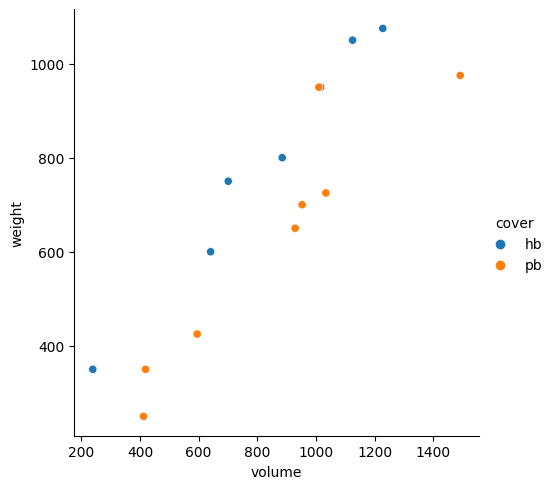

In [3]:
sns.relplot(data=books, x="volume", y="weight", hue="cover")

## Linear Regression using scitik-learn 
scikit-learn uses an object oriented system for implementing the various modeling approaches, the class for `LinearRegression` is part of the `linear_model` submodule.


In [135]:
from sklearn.linear_model import LinearRegression, LogisticRegression

Each modeling class needs to be constructed (potentially with options) and then the resulting object will provide attributes and methods.

In [7]:
lm = LinearRegression()
m = lm.fit(
  X = books[["volume"]],
  y = books.weight
)
m.coef_

array([0.70863714])

In [8]:
m.intercept_

107.679310613766

## A couple of considerations

When fitting a model, scikit-learn expects `X` to be a 2d array-like object (e.g. a `np.array` or `pd.DataFrame`) but will not accept a `pd.Series` or 1d `np.array`.


In [10]:
lm.fit(
  X = books.volume,
  y = books.weight
)

ValueError: Expected 2D array, got 1D array instead:
array=[ 885 1016 1125  239  701  641 1228  412  953  929 1492  419 1010  595
 1034].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:
lm.fit(
  X = np.array(books.volume),
  y = books.weight
)

ValueError: Expected 2D array, got 1D array instead:
array=[ 885 1016 1125  239  701  641 1228  412  953  929 1492  419 1010  595
 1034].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [12]:
lm.fit(
  X = np.array(books.volume).reshape(-1,1),
  y = books.weight
)

LinearRegression()

## Model parameters

Depending on the model being used, there will be a number of parameters that can be configured when creating the model object or via the `set_params()` method.

In [13]:
lm.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [14]:
lm.set_params(fit_intercept = False)

LinearRegression(fit_intercept=False)

In [15]:
lm = lm.fit(X = books[["volume"]], y = books.weight)
lm.intercept_

0.0

In [16]:
lm.coef_

array([0.81932487])

## Model prediction

Once the model coefficients have been fit, it is possible to predict using the model via the `predict()` method, this method requires a matrix-like `X` as input and in the case of `LinearRegression` returns an array of predicted y values.

In [17]:
lm.predict(X = books[["volume"]])

array([ 725.10251417,  832.43407276,  921.74048411,  195.81864507,
        574.34673721,  525.18724472, 1006.13094621,  337.5618484 ,
        780.81660565,  761.15280865, 1222.43271315,  343.29712253,
        827.51812351,  487.49830048,  847.1819205 ])

In [18]:
books["weight_lm_pred"] = lm.predict(X = books[["volume"]])
books

,volume,weight,cover,weight_lm_pred
0,885,800,hb,725.102514
1,1016,950,hb,832.434073
2,1125,1050,hb,921.740484
3,239,350,hb,195.818645
4,701,750,hb,574.346737
5,641,600,hb,525.187245
6,1228,1075,hb,1006.130946
7,412,250,pb,337.561848
8,953,700,pb,780.816606
9,929,650,pb,761.152809


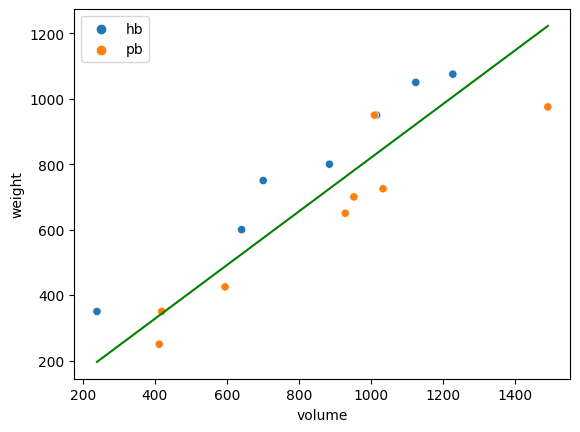

In [19]:
plt.figure()
sns.scatterplot(data=books, x="volume", y="weight", hue="cover")
sns.lineplot(data=books, x="volume", y="weight_lm_pred", color="green")
plt.show()

## Residuals?

There is no built in functionality for calculating residuals, so this needs to be done by hand.


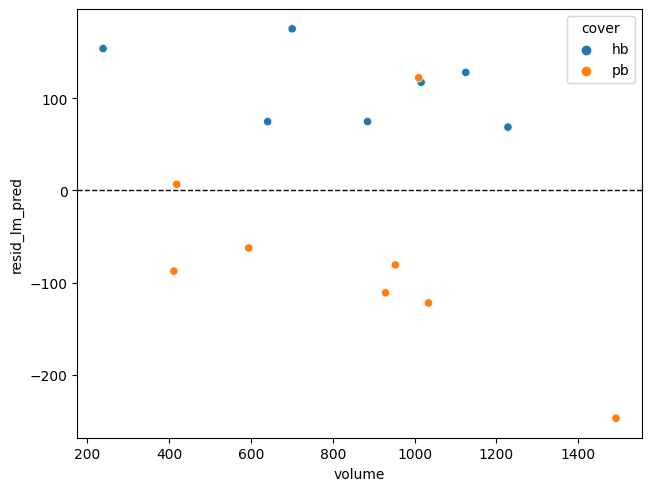

In [20]:
books["resid_lm_pred"] = books["weight"] - books["weight_lm_pred"]
plt.figure(layout="constrained")
ax = sns.scatterplot(data=books, x="volume", y="resid_lm_pred", hue="cover")
ax.axhline(c="k", ls="--", lw=1)
plt.show()

## Categorical variables?

Scikit-learn expects that the model matrix be numeric before fitting,


In [21]:
lm = lm.fit(
  X = books[["volume", "cover"]],
  y = books.weight
)

ValueError: could not convert string to float: 'hb'

the obvious solution here is dummy coding the categorical variables - this can be done with pandas via `pd.get_dummies()` or with a scikit-learn preprocessor, we'll demo the former first.


In [22]:
pd.get_dummies(books[["volume", "cover"]])

,volume,cover_hb,cover_pb
0,885,True,False
1,1016,True,False
2,1125,True,False
3,239,True,False
4,701,True,False
5,641,True,False
6,1228,True,False
7,412,False,True
8,953,False,True
9,929,False,True


In [23]:
lm = LinearRegression().fit(
  X = pd.get_dummies(books[["volume", "cover"]]),
  y = books.weight
)
lm.intercept_

105.93920788192202

In [24]:
lm.coef_

array([  0.71795374,  92.02363569, -92.02363569])

## Quick comparison with R

```{r}
d = read.csv('data/daag_books.csv')
d['cover_hb'] = ifelse(d$cover == "hb", 1, 0)
d['cover_pb'] = ifelse(d$cover == "pb", 1, 0)
(lm = lm(weight~volume+cover_hb+cover_pb, data=d))
summary(lm)
```

## Avoiding co-linearity

In [26]:
lm = LinearRegression(fit_intercept = False).fit(
  X = pd.get_dummies(books[["volume", "cover"]]),
  y = books.weight
)
lm.intercept_

0.0

In [27]:
lm.coef_

array([  0.71795374, 197.96284357,  13.91557219])

In [28]:
lm.feature_names_in_

array(['volume', 'cover_hb', 'cover_pb'], dtype=object)

In [29]:
lm = LinearRegression().fit(
  X = pd.get_dummies(books[["volume", "cover"]], drop_first=True),
  y = books.weight
)
lm.intercept_

197.96284357271753

In [30]:
lm.coef_

array([   0.71795374, -184.04727138])

In [31]:
lm.feature_names_in_

array(['volume', 'cover_pb'], dtype=object)

## Preprocessors

These are a set of transformer classes present in the `sklearn.preprocessing` submodule that are designed to help with the preparation of raw feature data into quantities more suitable for downstream modeling tools.

Like the modeling classes, they have an object oriented design that shares a common interface (methods and attributes) for bringing in data, transforming it, and returning it.

---

## OneHotEncoder

For dummy coding we can use the `OneHotEncoder` preprocessor, the default is to use one hot encoding but standard dummy coding can be achieved via the `drop` parameter.

In [32]:
from sklearn.preprocessing import OneHotEncoder

In [188]:
enc = OneHotEncoder(sparse_output=False)
enc.fit(X = books[["cover"]])

OneHotEncoder(sparse_output=False)

In [189]:
enc.transform(X = books[["cover"]])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

## Other useful bits

In [190]:
enc = OneHotEncoder(sparse_output=False, drop="first")
enc.fit_transform(X = books[["cover"]])

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [36]:
enc.get_feature_names_out()

array(['cover_pb'], dtype=object)

In [37]:
f = enc.transform(X = books[["cover"]])
enc.inverse_transform(f)

array([['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['hb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb'],
       ['pb']], dtype=object)


## A cautionary note

Unlike `pd.get_dummies()` it is not safe to use `OneHotEncoder` with both numerical and categorical features, as the former will also be transformed.

In [191]:
enc = OneHotEncoder(sparse_output=False)
X = enc.fit_transform(
  X = books[["volume", "cover"]]
)
pd.DataFrame(
  data=X,
  columns = enc.get_feature_names_out()
)

,volume_239,volume_412,volume_419,volume_595,volume_641,volume_701,volume_885,volume_929,volume_953,volume_1010,volume_1016,volume_1034,volume_1125,volume_1228,volume_1492,cover_hb,cover_pb
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Putting it together

In [192]:
cover = OneHotEncoder(sparse_output=False).fit_transform(books[["cover"]])

X = np.c_[books.volume, cover]
lm2 = LinearRegression(fit_intercept=False).fit(X = X,y = books.weight)
lm2.coef_

array([  0.71795374, 197.96284357,  13.91557219])

In [40]:
books["weight_lm2_pred"] = lm2.predict(X=X)
books.drop(["weight_lm_pred", "resid_lm_pred"], axis=1)

,volume,weight,cover,weight_lm2_pred
0,885,800,hb,833.351907
1,1016,950,hb,927.403847
2,1125,1050,hb,1005.660805
3,239,350,hb,369.553788
4,701,750,hb,701.248418
5,641,600,hb,658.171193
6,1228,1075,hb,1079.610041
7,412,250,pb,309.712515
8,953,700,pb,698.125490
9,929,650,pb,680.894600


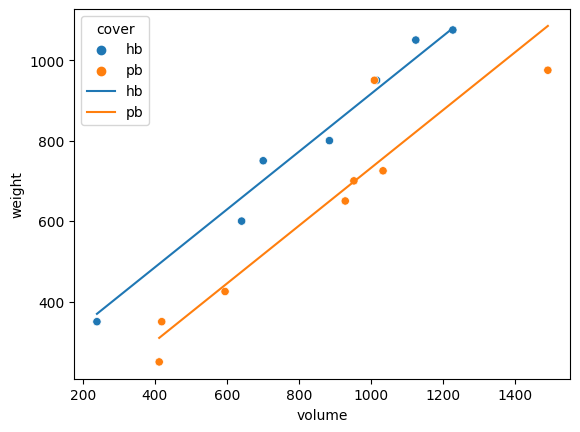

In [41]:
plt.figure()
sns.scatterplot(data=books, x="volume", y="weight", hue="cover")
sns.lineplot(data=books, x="volume", y="weight_lm2_pred", hue="cover")
plt.show()

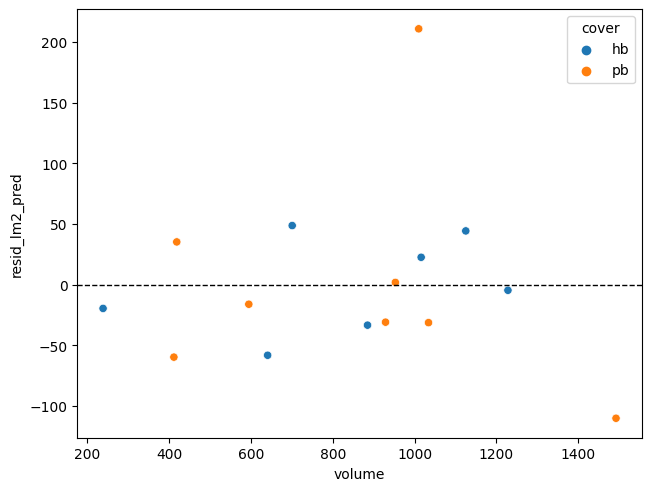

In [42]:
books["resid_lm2_pred"] = books["weight"] - books["weight_lm2_pred"]
plt.figure(layout="constrained")
ax = sns.scatterplot(data=books, x="volume", y="resid_lm2_pred", hue="cover")
ax.axhline(c="k", ls="--", lw=1)
plt.show()

## Model performance

Scikit-learn comes with a number of builtin functions for measuring model performance in the `sklearn.metrics` submodule - these are generally just functions that take the vectors `y_true` and `y_pred` and return the score as a scalar.

In [177]:
from sklearn.metrics import mean_squared_error, r2_score, classification_report

In [194]:
r2_score(books.weight, books.weight_lm_pred)

0.7800969547785038

In [195]:
mean_squared_error(books.weight, books.weight_lm_pred) # MSE

14833.68208377448

In [196]:
mean_squared_error(books.weight, books.weight_lm_pred, squared=False)

121.79360444528473

In [197]:
r2_score(books.weight, books.weight_lm2_pred)

0.9274775756821679

In [198]:
mean_squared_error(books.weight, books.weight_lm2_pred)

4892.040422595093

In [199]:
mean_squared_error(books.weight, books.weight_lm2_pred, squared=False)

69.94312276839727

[See [API Docs](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a list of available metrics]

## Exercise 1

Create and fit a model for the `books` data that includes an interaction effect between `volume` and `cover`. 

You will need to do this manually with `pd.getdummies()` or `OneHotEncoder()`.

---

## Polynomial regression

We will now look at another flavor of regession model, that involves preprocessing and a hyperparameter - namely polynomial regression.



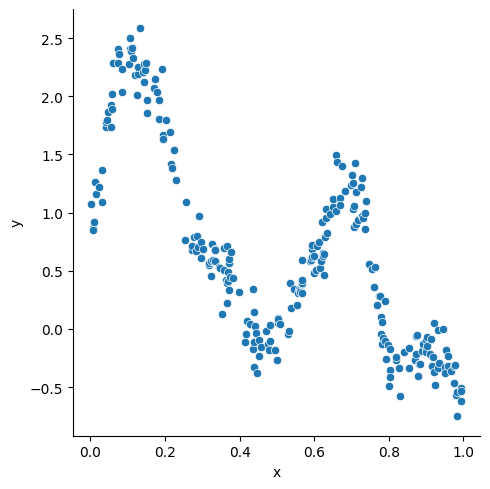

In [44]:
df = pd.read_csv("../data/gp.csv")
sns.relplot(data=df, x="x", y="y")

## By hand

It is certainly possible to construct the necessary model matrix by hand (or even use a function to automate the process), but this is less then desirable generally - particularly if we want to do anything fancy (e.g. cross validation)

In [46]:
X = np.c_[
    np.ones(df.shape[0]),
    df.x,
    df.x**2,
    df.x**3
]
plm = LinearRegression(fit_intercept = False).fit(X=X, y=df.y)
plm.coef_

array([ 2.36985684, -8.49429068, 13.95066369, -8.39215284])

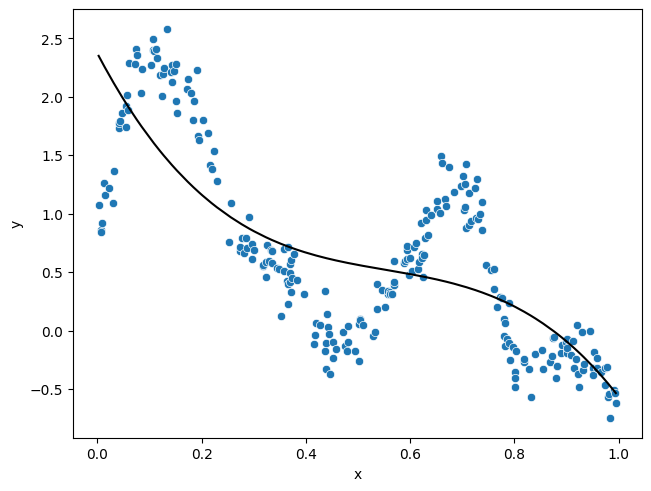

In [47]:
df["y_pred"] = plm.predict(X=X)
plt.figure(layout="constrained")
sns.scatterplot(data=df, x="x", y="y")
sns.lineplot(data=df, x="x", y="y_pred", color="k")
plt.show()

## PolynomialFeatures

This is another transformer class from `sklearn.preprocessing` that simplifies the process of constructing polynormial features for your model matrix. Usage is similar to that of `OneHotEncoder`.

In [48]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
X = np.array(range(6)).reshape(-1,1)

pf = PolynomialFeatures(degree=3)
pf.fit(X)
pf.transform(X)
pf.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3'], dtype=object)

In [51]:
pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit_transform(X)

pf.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

## Interactions

If the feature matrix `X` has more than one column then `PolynomialFeatures` transformer will include interaction terms with total degree up to `degree`.



In [52]:
X.reshape(-1, 2)
pf = PolynomialFeatures(degree=3, include_bias=False)
pf.fit_transform(X.reshape(-1, 2))

array([[  0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   1.],
       [  2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [53]:
pf.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [54]:
X.reshape(-1, 3)

array([[0, 1, 2],
       [3, 4, 5]])

In [55]:
pf = PolynomialFeatures(degree=2, include_bias=False)
pf.fit_transform(X.reshape(-1, 3))

array([[ 0.,  1.,  2.,  0.,  0.,  0.,  1.,  2.,  4.],
       [ 3.,  4.,  5.,  9., 12., 15., 16., 20., 25.]])

In [56]:
pf.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

## Modeling with PolynomialFeatures

In [57]:
def poly_model(X, y, degree):
    X  = PolynomialFeatures(degree=degree, include_bias=False).fit_transform(X=X)
    y_pred = LinearRegression().fit(X=X, y=y).predict(X)
    
    return mean_squared_error(y, y_pred, squared=False) 

poly_model(X = df[["x"]], y = df.y, degree = 2)

0.5449418707295371

In [58]:
poly_model(X = df[["x"]], y = df.y, degree = 3)

0.5208157900621085

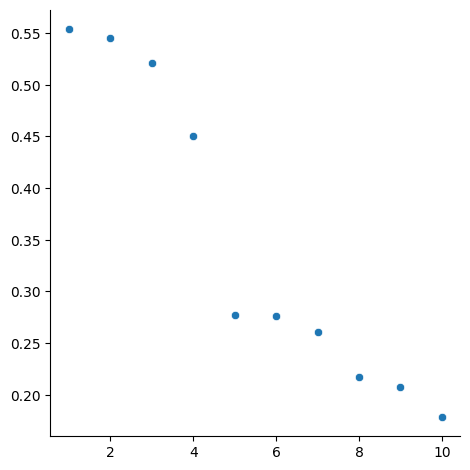

In [59]:
degrees = range(1,11)
rmses = [poly_model(X=df[["x"]], y=df.y, degree=d) for d in degrees]
sns.relplot(x=degrees, y=rmses)

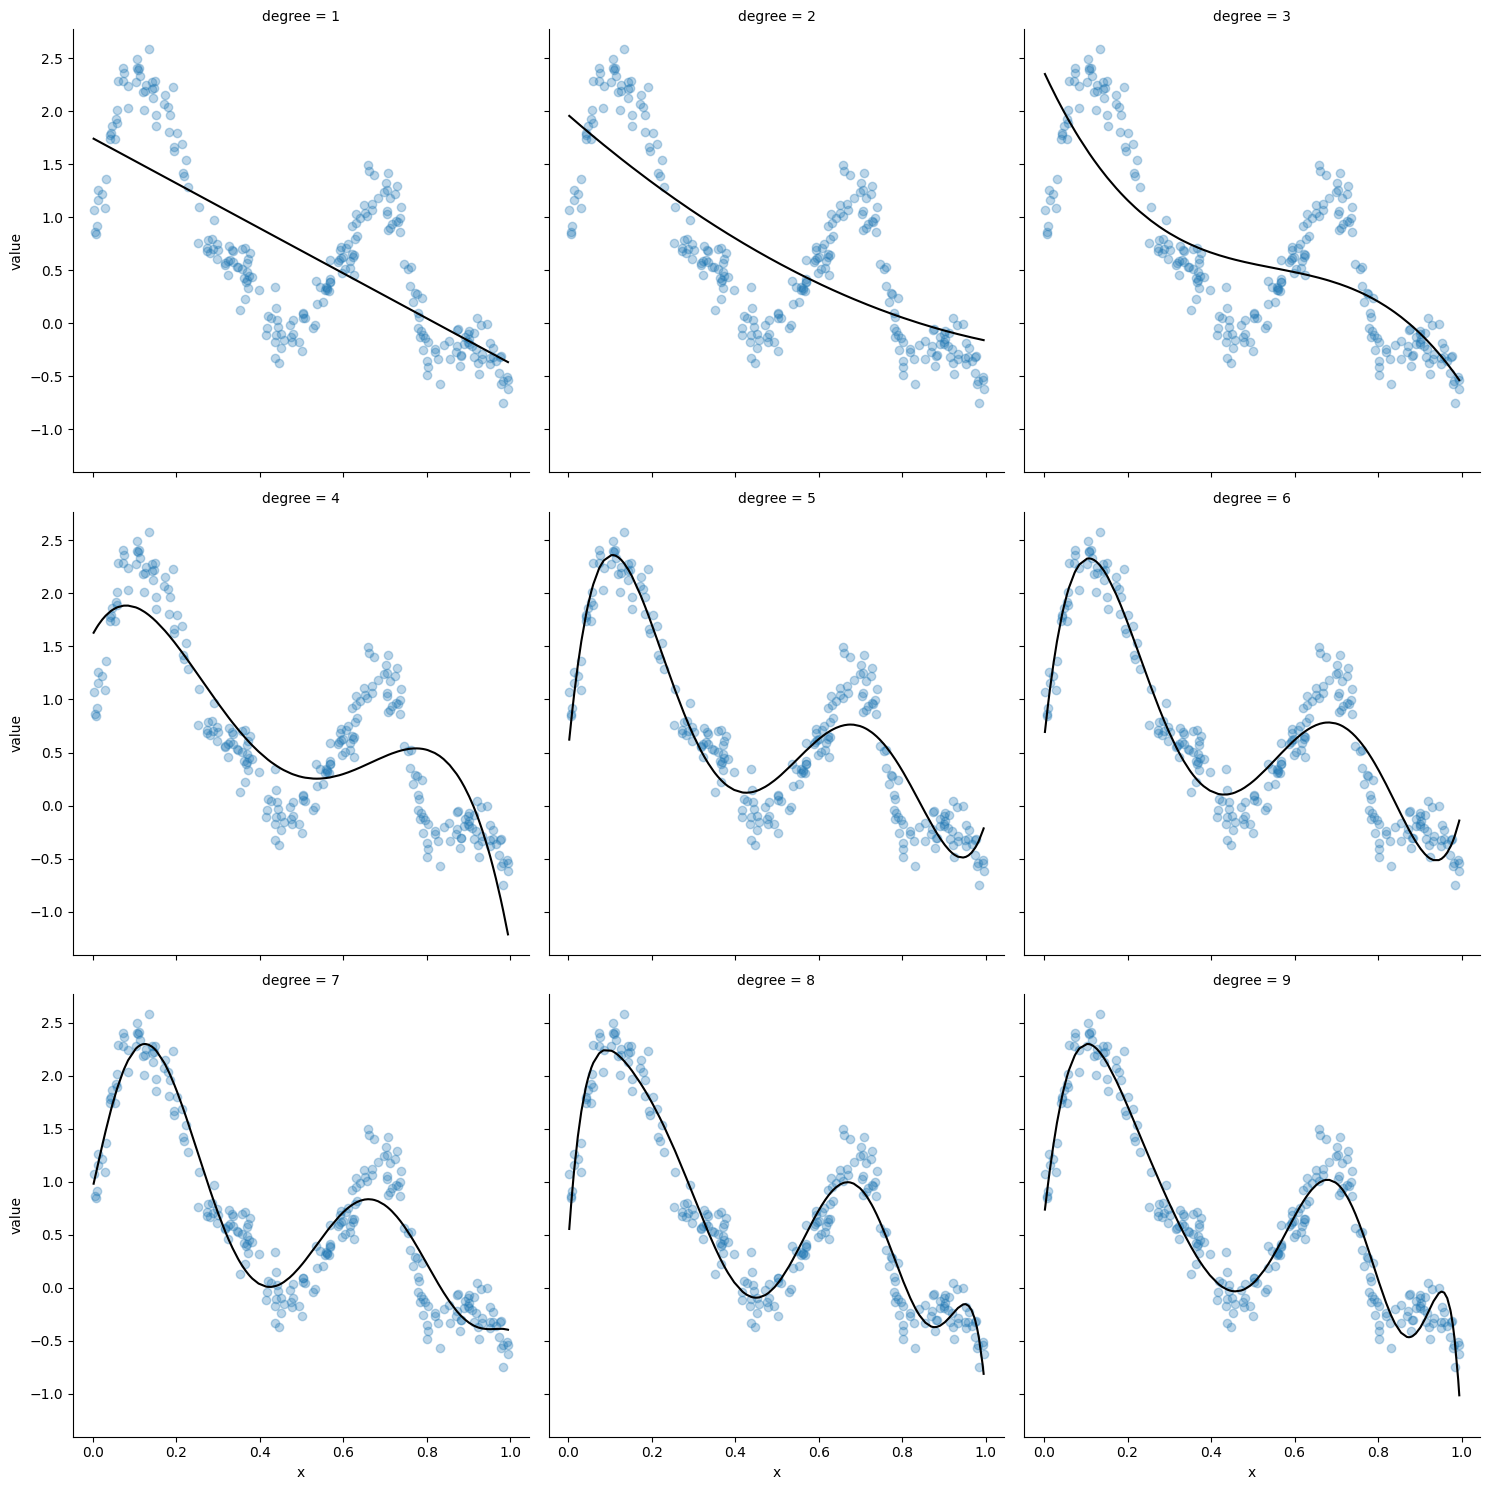

In [202]:
res = df.copy().drop("y_pred", axis=1)
for d in range(1,10):
    X  = PolynomialFeatures(degree=d, include_bias=False).fit_transform(X=res[["x"]])
    res[str(d)] = LinearRegression().fit(X=X, y=res.y).predict(X)

g = sns.relplot(data = res.melt(id_vars=["x","y"], var_name="degree"),x = "x", y="value", 
                col = "degree",col_wrap=3, kind="line", color="k")
[ ax.scatter(res.x, res.y, alpha=0.3)  for ax in g.axes ]

## Pipelines

You may have noticed that `PolynomialFeatures` takes a model matrix as input and returns a new model matrix as output which is then used as the input for `LinearRegression`. This is not an accident, and by structuring the library in this way sklearn is designed to enable the connection of these steps together, into what sklearn calls a *pipeline*.

In [60]:
from sklearn.pipeline import make_pipeline

In [211]:
p = make_pipeline(PolynomialFeatures(degree=4),LinearRegression())
p

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

## Using Pipelines

Once constructed, this object can be used just like our previous `LinearRegression` model (i.e. fit to our data and then used for prediction)

In [212]:
p = p.fit(X = df[["x"]], y = df.y)
p

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])

In [213]:
p.predict(X = df[["x"]])

array([ 1.6295693 ,  1.65734929,  1.6610466 ,  1.67779767,  1.69667491,
        1.70475286,  1.75280126,  1.78471392,  1.79049912,  1.82690007,
        1.82966357,  1.83376043,  1.84494343,  1.86002819,  1.86228095,
        1.86619112,  1.86837909,  1.87065283,  1.88417882,  1.8844024 ,
        1.88527174,  1.88577463,  1.88544367,  1.86890805,  1.86365035,
        1.86252922,  1.86047349,  1.85377801,  1.84937708,  1.83754576,
        1.82623453,  1.82024199,  1.81799793,  1.79767794,  1.77255319,
        1.77034143,  1.76574288,  1.75371272,  1.74389585,  1.73804309,
        1.73356954,  1.65527727,  1.64812184,  1.61867613,  1.6041325 ,
        1.5960389 ,  1.56080881,  1.55036459,  1.54004364,  1.50903953,
        1.45096594,  1.43589836,  1.41886389,  1.39423307,  1.36180712,
        1.23072992,  1.21355164,  1.11776117,  1.11522002,  1.09595388,
        1.06449719,  1.04672121,  1.03662739,  1.01407206,  0.98208703,
        0.98081577,  0.96176797,  0.87491417,  0.87117573,  0.84

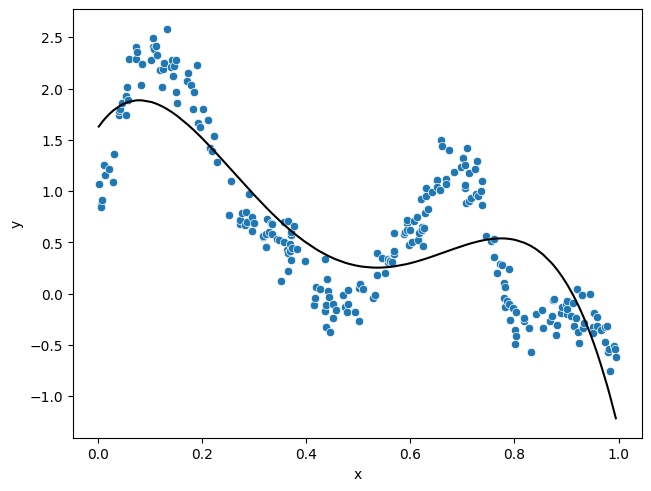

In [214]:
plt.figure(layout="constrained")
sns.scatterplot(data=df, x="x", y="y")
sns.lineplot(x=df.x, y=p.predict(X = df[["x"]]), color="k")
plt.show()

## Model coefficients (or other attributes)

The attributes of steps are not directly accessible, but can be accessed via `steps` or `named_steps` attributes,

In [215]:
p.coef_

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [216]:
p.named_steps["linearregression"].intercept_
p.steps[1][1].coef_
p.steps

[('polynomialfeatures', PolynomialFeatures(degree=4)),
 ('linearregression', LinearRegression())]

In [217]:
p.steps[0][1].get_feature_names_out()

array(['1', 'x', 'x^2', 'x^3', 'x^4'], dtype=object)

## What about step parameters?

By accessing each step we can adjust their parameters (via `set_params()`),

In [218]:
p.named_steps["linearregression"].get_params()
p.named_steps["linearregression"].set_params(fit_intercept=False)

LinearRegression(fit_intercept=False)

In [219]:
p.fit(X = df[["x"]], y = df.y)
p.named_steps["linearregression"].intercept_
p.named_steps["linearregression"].coef_

array([  1.61366366,   7.39051417, -57.67175293, 102.72227443,
       -55.38181361])

These parameters can also be directly accessed at the pipeline level, note how the names are constructed:

In [220]:
p.get_params()
p.set_params(linearregression__fit_intercept=True, polynomialfeatures__include_bias=False)

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linearregression', LinearRegression())])

In [221]:
p.fit(X = df[["x"]], y = df.y)
p.named_steps["linearregression"].intercept_
p.named_steps["linearregression"].coef_

array([  7.39051417, -57.67175293, 102.72227443, -55.38181361])

## Tuning parameters

We've already seen a manual approach to tuning models over the degree parameter, scikit-learn also has built in tools to aide with this process. Here we will leverage GridSearchCV to tune the degree parameter in our pipeline.

In [65]:
from sklearn.model_selection import GridSearchCV, KFold

In [66]:
p = make_pipeline(
    PolynomialFeatures(include_bias=True),
    LinearRegression(fit_intercept=False)
)
grid_search = GridSearchCV(
  estimator = p, 
  param_grid = {"polynomialfeatures__degree": range(1,11)},
  scoring = "neg_root_mean_squared_error",
  cv = KFold(shuffle=True)
)
grid_search

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'polynomialfeatures__degree': range(1, 11)},
             scoring='neg_root_mean_squared_error')

In [67]:
grid_search.fit(X = df[["x"]], y = df.y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'polynomialfeatures__degree': range(1, 11)},
             scoring='neg_root_mean_squared_error')

In [68]:
grid_search.best_index_

9

In [69]:
grid_search.best_params_

{'polynomialfeatures__degree': 10}

In [70]:
grid_search.best_score_

-0.18736877504118257

In [71]:
grid_search.cv_results_["mean_test_score"]

array([-0.56099566, -0.5528788 , -0.52906354, -0.45955521, -0.28555526,
       -0.28492194, -0.26860956, -0.22811806, -0.21782297, -0.18736878])

In [72]:
grid_search.cv_results_["rank_test_score"]

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int32)

In [73]:
grid_search.cv_results_["mean_fit_time"]

array([0.00253534, 0.00140414, 0.00123501, 0.00121245, 0.00118284,
       0.00117207, 0.00100598, 0.0009635 , 0.00086961, 0.00089064])

In [74]:
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_polynomialfeatures__degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

## Column Transformers

Are a tool for selectively applying transformer(s) to the columns of an array or DataFrame, they function in a way that is similar to a pipeline and similarly have a helper function `make_column_transformer()`.

In [80]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector 

In [77]:
ct = make_column_transformer(
  (StandardScaler(), ["volume"]),
  (OneHotEncoder(), ["cover"]),).fit(books)

In [78]:
ct.get_feature_names_out()

array(['standardscaler__volume', 'onehotencoder__cover_hb',
       'onehotencoder__cover_pb'], dtype=object)

In [79]:
ct.transform(books)

array([[ 0.12100717,  1.        ,  0.        ],
       [ 0.51996539,  1.        ,  0.        ],
       [ 0.85192299,  1.        ,  0.        ],
       [-1.84637457,  1.        ,  0.        ],
       [-0.43936162,  1.        ,  0.        ],
       [-0.62209057,  1.        ,  0.        ],
       [ 1.1656077 ,  1.        ,  0.        ],
       [-1.31950608,  0.        ,  1.        ],
       [ 0.32809999,  0.        ,  1.        ],
       [ 0.25500841,  0.        ,  1.        ],
       [ 1.9696151 ,  0.        ,  1.        ],
       [-1.2981877 ,  0.        ,  1.        ],
       [ 0.5016925 ,  0.        ,  1.        ],
       [-0.76218277,  0.        ,  1.        ],
       [ 0.57478408,  0.        ,  1.        ]])

## Keeping or dropping other columns

One addition important argument is `remainder` which determines what happens to not specified columns. The default is `"drop"` which is why `weight` was removed, the alternative is `"passthrough"` which then retains untransformed columns.

In [81]:
ct = make_column_transformer(
  ( StandardScaler(), 
    make_column_selector(dtype_include=np.number)),
  ( OneHotEncoder(), 
    make_column_selector(dtype_include=[object, bool])))

ct.fit_transform(books)

array([[ 0.12100717,  0.35935849,  0.12100717,  0.50241853,  0.50648367,
        -0.47684326,  1.        ,  0.        ],
       [ 0.51996539,  0.93689893,  0.51996539,  0.85513044,  0.88250042,
         0.32306468,  1.        ,  0.        ],
       [ 0.85192299,  1.32192589,  0.85192299,  0.9435273 ,  1.19536932,
         0.63393216,  1.        ,  0.        ],
       [-1.84637457, -1.37326282, -1.84637457,  1.15780607, -1.34776686,
        -0.27956699,  1.        ,  0.        ],
       [-0.43936162,  0.16684502, -0.43936162,  1.3353002 , -0.02166199,
         0.69701752,  1.        ,  0.        ],
       [-0.62209057, -0.41069542, -0.62209057,  0.50171812, -0.1938834 ,
        -0.83169282,  1.        ,  0.        ],
       [ 1.1656077 ,  1.41818263,  1.1656077 ,  0.45258545,  1.49101607,
        -0.06591128,  1.        ,  0.        ],
       [-1.31950608, -1.75828978, -1.31950608, -0.84052582, -1.58701042,
        -0.85372961,  0.        ,  1.        ],
       [ 0.32809999, -0.02566846

## Column selection

One lingering issue with the above approach is that we've had to hard code the column names (can also use indexes). Often we want to select columns based on their dtype (e.g. categorical vs numerical) this can be done via pandas or sklearn,

In [82]:
ct = make_column_transformer(
  ( StandardScaler(), 
    books.select_dtypes(include=['number']).columns ),
  ( OneHotEncoder(), 
    books.select_dtypes(include=['object']).columns )
)
ct.fit_transform(books)

array([[ 0.12100717,  0.35935849,  0.12100717,  0.50241853,  0.50648367,
        -0.47684326,  1.        ,  0.        ],
       [ 0.51996539,  0.93689893,  0.51996539,  0.85513044,  0.88250042,
         0.32306468,  1.        ,  0.        ],
       [ 0.85192299,  1.32192589,  0.85192299,  0.9435273 ,  1.19536932,
         0.63393216,  1.        ,  0.        ],
       [-1.84637457, -1.37326282, -1.84637457,  1.15780607, -1.34776686,
        -0.27956699,  1.        ,  0.        ],
       [-0.43936162,  0.16684502, -0.43936162,  1.3353002 , -0.02166199,
         0.69701752,  1.        ,  0.        ],
       [-0.62209057, -0.41069542, -0.62209057,  0.50171812, -0.1938834 ,
        -0.83169282,  1.        ,  0.        ],
       [ 1.1656077 ,  1.41818263,  1.1656077 ,  0.45258545,  1.49101607,
        -0.06591128,  1.        ,  0.        ],
       [-1.31950608, -1.75828978, -1.31950608, -0.84052582, -1.58701042,
        -0.85372961,  0.        ,  1.        ],
       [ 0.32809999, -0.02566846

## Demo 1 - Putting it together <br/> Interaction model

## Cross validation & hyper parameter tuning
## Ridge regression data

In [228]:
d = pd.read_csv("../data/ridge.csv")
d

,y,x1,x2,x3,x4,x5
0,-0.151710,0.353658,1.633932,0.553257,1.415731,A
1,3.579895,1.311354,1.457500,0.072879,0.330330,B
2,0.768329,-0.744034,0.710362,-0.246941,0.008825,B
3,7.788646,0.806624,-0.228695,0.408348,-2.481624,B
4,1.394327,0.837430,-1.091535,-0.860979,-0.810492,A
...,...,...,...,...,...,...
495,-0.204932,-0.385814,-0.130371,-0.046242,0.004914,A
496,0.541988,0.845885,0.045291,0.171596,0.332869,A
497,-1.402627,-1.071672,-1.716487,-0.319496,-1.163740,C
498,-0.043645,1.744800,-0.010161,0.422594,0.772606,A


In [229]:
d = pd.get_dummies(d)
d

,y,x1,x2,x3,x4,x5_A,x5_B,x5_C,x5_D
0,-0.151710,0.353658,1.633932,0.553257,1.415731,True,False,False,False
1,3.579895,1.311354,1.457500,0.072879,0.330330,False,True,False,False
2,0.768329,-0.744034,0.710362,-0.246941,0.008825,False,True,False,False
3,7.788646,0.806624,-0.228695,0.408348,-2.481624,False,True,False,False
4,1.394327,0.837430,-1.091535,-0.860979,-0.810492,True,False,False,False
...,...,...,...,...,...,...,...,...,...
495,-0.204932,-0.385814,-0.130371,-0.046242,0.004914,True,False,False,False
496,0.541988,0.845885,0.045291,0.171596,0.332869,True,False,False,False
497,-1.402627,-1.071672,-1.716487,-0.319496,-1.163740,False,False,True,False
498,-0.043645,1.744800,-0.010161,0.422594,0.772606,True,False,False,False


## Fitting a ridge regession model

The `linear_model` submodule also contains the `Ridge` model which can be used to fit a ridge regression, usage is identical other than `Ridge()` takes the parameter `alpha` to specify the regularization strength.

In [230]:
from sklearn.linear_model import Ridge, LinearRegression

In [231]:
X, y = d.drop(["y"], axis=1), d.y
rg = Ridge(fit_intercept=False, alpha=10).fit(X, y)
lm = LinearRegression(fit_intercept=False).fit(X, y)

In [232]:
rg.coef_

array([ 9.78094427e-01,  1.96214789e+00,  1.72468416e-03, -2.94457278e+00,
        4.55579498e-01,  9.00081205e-02, -2.81934999e-01,  7.97808337e-01])

In [233]:
lm.coef_

array([ 9.95049976e-01,  2.00761962e+00,  2.31665882e-03, -3.00088386e+00,
        4.93293037e-01,  1.01926957e-01, -2.94125938e-01,  1.00855936e+00])

In [234]:
mean_squared_error(y, rg.predict(X))

0.019101431349883385

In [235]:
mean_squared_error(y, lm.predict(X))

0.009872435924102045

[Generally for a Ridge (or Lasso) model it is important to scale the features before fitting - in this case this is not necessary as $x\_1,\ldots,x\_4$ all have mean of ~0 and std dev of ~1 ]


### Test - training datasets 
The most basic form of CV is to split the data into a testing and training set, this can be achieved using `train_test_split` from the `model_selection` submodule.



In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [238]:
print(f"X.shape={X.shape} \nX_train.shape={X_train.shape}\nX_test.shape = {X_test.shape}")

X.shape=(500, 8) 
X_train.shape=(400, 8)
X_test.shape = (100, 8)


In [239]:
print(f"y.shape={y.shape} \ny_train.shape={y_train.shape}\ny_test.shape = {y_test.shape}")

y.shape=(500,) 
y_train.shape=(400,)
y_test.shape = (100,)


In [241]:
alpha = np.logspace(-2,1, 100)
train_rmse = []
test_rmse = []
for a in alpha:
    rg = Ridge(alpha=a).fit(X_train, y_train)
    train_rmse.append( 
      mean_squared_error(y_train, rg.predict(X_train), squared=False) 
    )
    test_rmse.append( 
      mean_squared_error(y_test, rg.predict(X_test), squared=False) 
    )
res = pd.DataFrame(data = {"alpha": alpha, "train_rmse": train_rmse, "test_rmse": test_rmse})
res

,alpha,train_rmse,test_rmse
0,0.010000,0.097568,0.106985
1,0.010723,0.097568,0.106984
2,0.011498,0.097568,0.106984
3,0.012328,0.097568,0.106983
4,0.013219,0.097568,0.106983
...,...,...,...
95,7.564633,0.126990,0.129414
96,8.111308,0.130591,0.132458
97,8.697490,0.134568,0.135838
98,9.326033,0.138950,0.139581


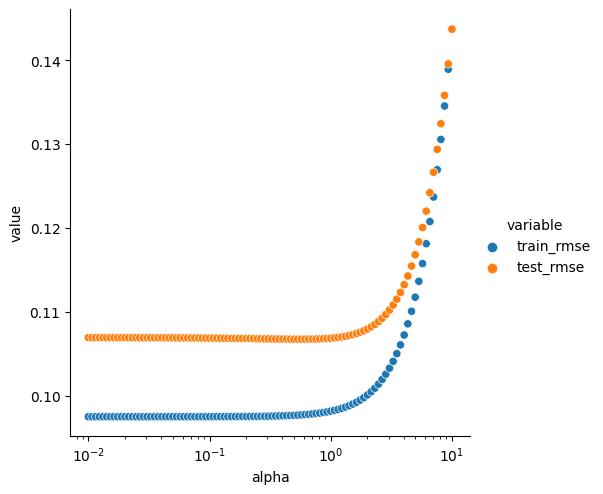

In [242]:
g = sns.relplot(x="alpha", y="value", hue="variable", data = pd.melt(res, id_vars=["alpha"]))
g.set(xscale="log")

## Best alpha?

In [243]:
min_i = np.argmin(res.train_rmse)
min_i

0

In [244]:
res.iloc[[min_i],:]

,alpha,train_rmse,test_rmse
0,0.01,0.097568,0.106985


In [245]:
min_i = np.argmin(res.test_rmse)
min_i

58

In [246]:
res.iloc[[min_i],:]

,alpha,train_rmse,test_rmse
58,0.572237,0.097787,0.1068


## k-fold cross-validation 

The previous approach was relatively straight forward, but it required a fair bit of book keeping code to implement and we only examined a single test train split. If we would like to perform k-fold cross validation we can use `cross_val_score` from the `model_selection` submodule.

In [247]:
from sklearn.model_selection import cross_val_score
cross_val_score( Ridge(alpha=0.59, fit_intercept=False), X, y, cv=5, scoring="neg_root_mean_squared_error")

array([-0.09363885, -0.09995222, -0.1047411 , -0.10272958, -0.10596871])

In [248]:
cross_val_score(
  Ridge(alpha=0.59, fit_intercept=False), 
  X, y, 
  cv=5, 
  scoring="neg_root_mean_squared_error"
)


array([-0.09363885, -0.09995222, -0.1047411 , -0.10272958, -0.10596871])

## Controling k-fold behavior

Rather than providing `cv` as an integer, it is better to specify a cross-validation scheme directly (with additional options). Here we will use the `KFold` class from the `model_selection` submodule. 

In [249]:
from sklearn.model_selection import KFold

In [250]:
cross_val_score(
  Ridge(alpha=0.59, fit_intercept=False), 
  X, y, 
  cv = KFold(n_splits=5, shuffle=True, random_state=1234), 
  scoring="neg_root_mean_squared_error"
)

array([-0.10658115, -0.10399824, -0.10370026, -0.10124638, -0.09228174])

## KFold object

`KFold()` returns a class object which provides the method `split()` which in turn is a generator that returns a tuple with the indexes of the training and testing selects for each fold given a model matrix `X`,

In [251]:
ex = pd.DataFrame(data = list(range(10)), columns=["x"])
cv = KFold(5)
for train, test in cv.split(ex):
    print(f'Train: {train} | test: {test}')

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


In [252]:
cv = KFold(5, shuffle=True, random_state=1234)
for train, test in cv.split(ex):
    print(f'Train: {train} | test: {test}')

Train: [0 1 3 4 5 6 8 9] | test: [2 7]
Train: [0 2 3 4 5 6 7 8] | test: [1 9]
Train: [1 2 3 4 5 6 7 9] | test: [0 8]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 4 5 7 8 9] | test: [3 6]


## Train vs Test rmse (again)

In [253]:
alpha = np.logspace(-2,1, 30)
test_mean_rmse = []
test_rmse = []
cv = KFold(n_splits=5, shuffle=True, random_state=1234)
for a in alpha:
    rg = Ridge(fit_intercept=False, alpha=a).fit(X_train, y_train)
    scores = -1 * cross_val_score(
      rg, X, y, 
      cv = cv, 
      scoring="neg_root_mean_squared_error"
    )
    test_mean_rmse.append(np.mean(scores))
    test_rmse.append(scores)
res = pd.DataFrame(
    data = np.c_[alpha, test_mean_rmse, test_rmse],
    columns = ["alpha", "mean_rmse"] + ["fold" + str(i) for i in range(1,6) ]
)
res

,alpha,mean_rmse,fold1,fold2,fold3,fold4,fold5
0,0.010000,0.101257,0.106979,0.103691,0.102288,0.101130,0.092195
1,0.012690,0.101257,0.106976,0.103692,0.102292,0.101129,0.092194
2,0.016103,0.101256,0.106971,0.103692,0.102298,0.101126,0.092194
3,0.020434,0.101256,0.106966,0.103693,0.102306,0.101123,0.092193
4,0.025929,0.101256,0.106959,0.103694,0.102316,0.101120,0.092191
5,0.032903,0.101256,0.106951,0.103696,0.102328,0.101116,0.092190
6,0.041753,0.101256,0.106940,0.103698,0.102344,0.101110,0.092188
7,0.052983,0.101256,0.106927,0.103701,0.102365,0.101104,0.092186
8,0.067234,0.101257,0.106911,0.103704,0.102391,0.101096,0.092184
9,0.085317,0.101259,0.106890,0.103709,0.102426,0.101088,0.092181


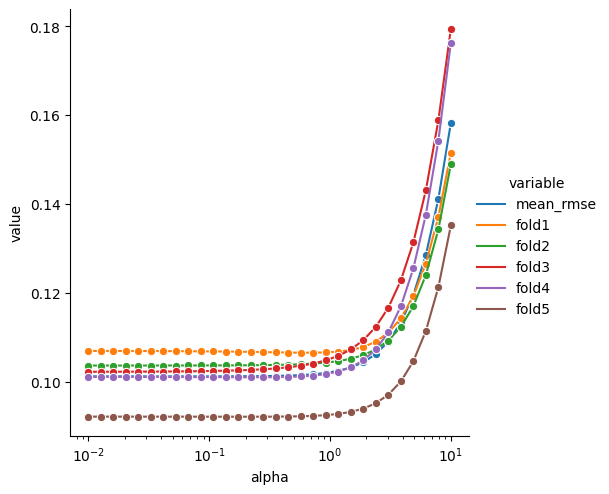

In [111]:
g = sns.relplot(x="alpha", y="value", hue="variable", data=res.melt(id_vars=["alpha"]), marker="o", kind="line")
g.set(xscale="log")

## Best alpha? (again)

In [254]:
i = res.drop(
  ["alpha"], axis=1
).agg(
  np.argmin
).to_numpy()
i = np.sort(np.unique(i))
res.iloc[ i, : ]

,alpha,mean_rmse,fold1,fold2,fold3,fold4,fold5
0,0.010000,0.101257,0.106979,0.103691,0.102288,0.101130,0.092195
5,0.032903,0.101256,0.106951,0.103696,0.102328,0.101116,0.092190
12,0.174333,0.101276,0.106800,0.103739,0.102607,0.101060,0.092174
13,0.221222,0.101291,0.106758,0.103758,0.102710,0.101055,0.092175
18,0.727895,0.101729,0.106580,0.104128,0.104149,0.101420,0.092367


## Aside - Available metrics 

For most of the cross validation functions we pass in a string instead of a scoring function from the metrics submodule - if you are interested in seeing the names of the possible metrics, these are available via the `sklearn.metrics.SCORERS` dictionary,

In [262]:
np.array( sorted(sklearn.metrics._scorer._SCORERS.keys()))

array(['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score',
       'average_precision', 'balanced_accuracy', 'completeness_score',
       'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples',
       'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score',
       'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples',
       'jaccard_weighted', 'matthews_corrcoef', 'max_error',
       'mutual_info_score', 'neg_brier_score', 'neg_log_loss',
       'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error',
       'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance',
       'neg_mean_squared_error', 'neg_mean_squared_log_error',
       'neg_median_absolute_error', 'neg_negative_likelihood_ratio',
       'neg_root_mean_squared_error', 'normalized_mutual_info_score',
       'positive_likelihood_ratio', 'precision', 'precision_macro',
       'precision_micro', 'precision_samples', 'precision_weighted', 'r2',
       'rand_score', 'recall', 'recall_ma

## Grid Search

We can further reduce the amount of code needed if there is a specific set of parameter values we would like to explore using cross validation. This is done using the `GridSearchCV` function from the `model_selection` submodule.

In [266]:
gs = GridSearchCV(
  Ridge(fit_intercept=False),
  {"alpha": np.logspace(-2, 1, 30)},
  cv = KFold(5, shuffle=True, random_state=1234),
  scoring = "neg_root_mean_squared_error"
).fit(
  X, y
)

In [264]:
gs.best_index_

5

In [265]:
gs.best_params_

{'alpha': 0.03290344562312668}

In [120]:
gs.best_score_

-0.10125611767453653

## `best_estimator_` attribute

If `refit = True` (the default) with `GridSearchCV()` then the `best_estimator_` attribute will be available which gives direct access to the "best" model or pipeline object. This model is constructed by using the parameter(s) that achieved the maximum score and refitting the model to the complete data set.

In [121]:
gs.best_estimator_

Ridge(alpha=0.03290344562312668, fit_intercept=False)

In [122]:
gs.best_estimator_.coef_

array([ 9.94994054e-01,  2.00746835e+00,  2.31191242e-03, -3.00069733e+00,
        4.93160501e-01,  1.01885074e-01, -2.94083502e-01,  1.00766853e+00])

In [123]:
gs.best_estimator_.predict(X)

array([-1.21787199e-01,  3.34150880e+00,  7.60551636e-01,  7.89292125e+00,
        1.56522656e+00, -5.33575295e+00, -4.37469266e+00,  3.13002847e+00,
       -1.68588885e-01, -1.60087435e+00, -1.89073422e+00,  1.44596081e+00,
        3.99773008e+00,  4.70002558e+00, -6.45959151e+00,  4.11085198e+00,
        3.60426204e+00, -1.96548366e+00,  2.99038749e+00,  5.67961035e-01,
       -5.26672107e+00,  5.49659970e+00,  3.47246808e+00, -2.66116708e+00,
        3.35010828e+00,  6.42211180e-01, -1.50237605e+00,  2.41562211e+00,
        3.11665106e+00,  1.11236410e+00, -2.11839452e+00,  1.36006099e+00,
       -5.36658668e-01, -2.78112214e+00,  7.60075910e-01,  5.49778876e+00,
        2.65209729e+00, -8.31269761e-01,  4.16653878e-02, -1.92584865e+00,
       -2.48864762e+00,  2.29126952e+00,  3.62514060e+00, -2.01225930e+00,
       -6.97247107e-01, -1.94513559e+00, -4.75590806e-01, -7.36556969e+00,
       -3.20765943e+00,  2.92180445e+00, -8.21299266e-01, -2.78598107e+00,
       -1.25514261e+01,  

## `cv_results_` attribute

Other useful details about the grid search process are stored in the dictionary `cv_results_` attribute which includes things like average test scores, fold level test scores, test ranks, test runtimes, etc.

In [124]:
gs.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [125]:
gs.cv_results_["param_alpha"]

masked_array(data=[0.01, 0.01268961003167922, 0.01610262027560939,
                   0.020433597178569417, 0.02592943797404667,
                   0.03290344562312668, 0.041753189365604,
                   0.05298316906283707, 0.06723357536499334,
                   0.08531678524172806, 0.10826367338740546,
                   0.1373823795883263, 0.17433288221999882,
                   0.2212216291070449, 0.2807216203941177,
                   0.3562247890262442, 0.4520353656360243,
                   0.5736152510448679, 0.727895384398315,
                   0.9236708571873861, 1.1721022975334805,
                   1.4873521072935119, 1.8873918221350976,
                   2.395026619987486, 3.039195382313198,
                   3.856620421163472, 4.893900918477494,
                   6.2101694189156165, 7.880462815669913, 10.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
       

In [126]:
gs.cv_results_["mean_test_score"]

array([-0.1012567 , -0.10125657, -0.10125644, -0.1012563 , -0.10125618,
       -0.10125612, -0.10125618, -0.10125648, -0.10125724, -0.10125879,
       -0.10126169, -0.10126691, -0.10127596, -0.10129134, -0.10131712,
       -0.10135981, -0.10142988, -0.10154403, -0.10172878, -0.10202588,
       -0.1025005 , -0.10325306, -0.10443572, -0.10627385, -0.10909116,
       -0.11333455, -0.11959127, -0.12859038, -0.14118507, -0.15832381])

In [127]:
gs.cv_results_["mean_fit_time"]

array([0.0020225 , 0.00105782, 0.00087619, 0.00081239, 0.00076504,
       0.00078421, 0.00076485, 0.00075965, 0.00070834, 0.0006495 ,
       0.00062151, 0.00056396, 0.00056567, 0.00056872, 0.00058336,
       0.00056148, 0.00057292, 0.00059061, 0.0005681 , 0.00057821,
       0.00057168, 0.00056949, 0.00056744, 0.00056543, 0.00056663,
       0.00056729, 0.00056381, 0.00057278, 0.00056558, 0.00056858])

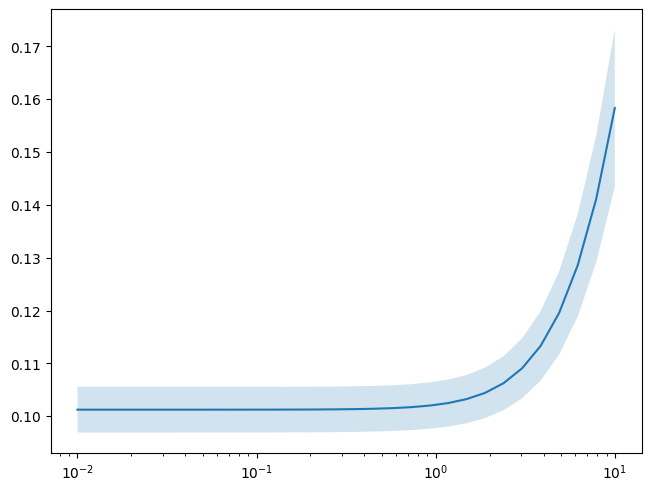

In [128]:
alpha = np.array(gs.cv_results_["param_alpha"],dtype="float64")
score = -gs.cv_results_["mean_test_score"]
score_std = gs.cv_results_["std_test_score"]
n_folds = gs.cv.get_n_splits()
plt.figure(layout="constrained")
ax = sns.lineplot(x=alpha, y=score)
ax.set_xscale("log")
plt.fill_between(
  x = alpha,
  y1 = score + 1.96*score_std / np.sqrt(n_folds),
  y2 = score - 1.96*score_std / np.sqrt(n_folds),
  alpha = 0.2
)
plt.show()


## Ridge traceplot

In [129]:
alpha = np.logspace(-2,3, 100)
betas = []
for a in alpha:
    rg = Ridge(alpha=a).fit(X, y)
    betas.append(rg.coef_)
res = pd.DataFrame(
  data = betas, columns = rg.feature_names_in_
).assign(
  alpha = alpha  
)
res

,x1,x2,x3,x4,x5_A,x5_B,x5_C,x5_D,alpha
0,0.995032,2.007574,0.002317,-3.000828,0.165900,-0.225440,-0.621467,0.681007,0.010000
1,0.995030,2.007568,0.002317,-3.000821,0.165903,-0.225435,-0.621458,0.680990,0.011233
2,0.995027,2.007562,0.002317,-3.000813,0.165905,-0.225428,-0.621448,0.680971,0.012619
3,0.995024,2.007555,0.002317,-3.000804,0.165909,-0.225421,-0.621437,0.680949,0.014175
4,0.995021,2.007547,0.002317,-3.000794,0.165912,-0.225413,-0.621424,0.680925,0.015923
...,...,...,...,...,...,...,...,...,...
95,0.464132,0.796323,0.025934,-1.347516,0.046700,-0.022499,-0.101339,0.077138,628.029144
96,0.435572,0.740631,0.025662,-1.261824,0.042058,-0.020376,-0.092306,0.070625,705.480231
97,0.407421,0.686644,0.025218,-1.177716,0.037789,-0.018419,-0.083926,0.064556,792.482898
98,0.379853,0.634638,0.024615,-1.095694,0.033883,-0.016620,-0.076176,0.058912,890.215085


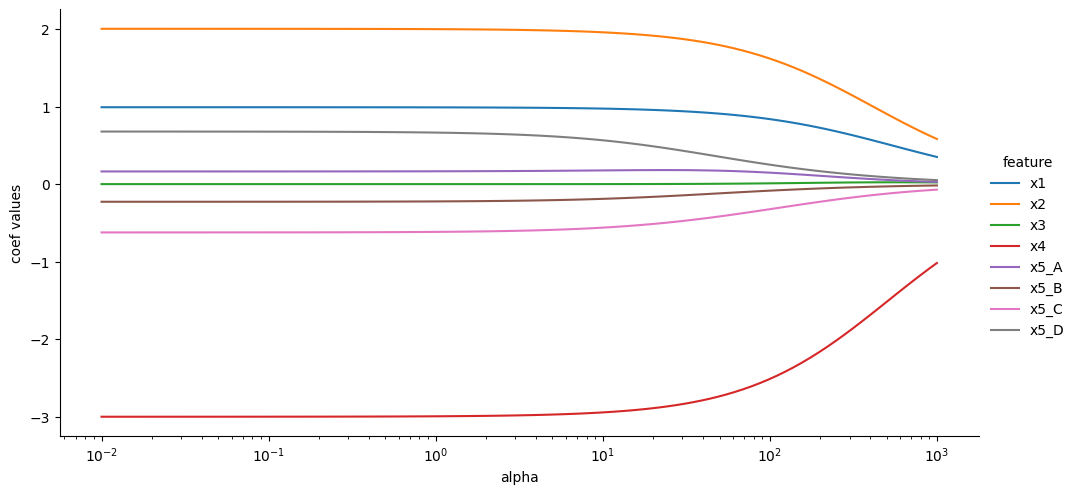

In [130]:
g = sns.relplot(
  data = res.melt(id_vars="alpha", value_name="coef values", var_name="feature"),
  x = "alpha", y = "coef values", hue = "feature",
  kind = "line", aspect=2
)
g.set(xscale="log")

## Exercise 1

Obtain the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html) from sklearn using the following code,

```{python}
from sklearn import datasets
X, y = datasets.load_diabetes(return_X_y=True)
```

Our goal is to fit a Lasso model to these data and determine an optimal value of `alpha` using cross validation. Make sure to perform each of the following:

* Verify whether scaling is necessary for these data

* Even if scaling is not necessary, implement a pipeline that integrates `StandardScaler()` and `Lasso()`

* Find the "optimal" value of `alpha` using `GridSearchCV()` and an appropriate metric, how robust does this result appear to be?

* Time permitting, construct a traceplot of coefficients from the lasso models as a function of `alpha`

---

## Dataset details


In [268]:
from sklearn import datasets
datasets.load_diabetes()["feature_names"]
print(datasets.load_diabetes()["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## OpenIntro - Spam

We will start by looking at a data set on spam emails from the [OpenIntro project](https://www.openintro.org/). A full data dictionary can be found [here](https://www.openintro.org/data/index.php?data=email). To keep things simple this week we will restrict our exploration to including only the following columns: `spam`, `exclaim_mess`, `format`, `num_char`,  `line_breaks`, and `number`.

* `spam` - Indicator for whether the email was spam.
* `exclaim_mess` - The number of exclamation points in the email message.
* `format` - Indicates whether the email was written using HTML (e.g. may have included bolding or active links).
* `num_char` - The number of characters in the email, in thousands.
* `line_breaks` - The number of line breaks in the email (does not count text wrapping).
* `number` - Factor variable saying whether there was no number, a small number (under 1 million), or a big number.



In [131]:
email = pd.read_csv('../data/email.csv')[ ['spam', 'exclaim_mess', 'format', 'num_char', 'line_breaks', 'number'] ]
email

,spam,exclaim_mess,format,num_char,line_breaks,number
0,0,0,1,11.370,202,big
1,0,1,1,10.504,202,small
2,0,6,1,7.773,192,small
3,0,48,1,13.256,255,small
4,0,1,0,1.231,29,none
...,...,...,...,...,...,...
3916,1,0,0,0.332,12,small
3917,1,0,0,0.323,15,small
3918,0,5,1,8.656,208,small
3919,0,0,0,10.185,132,small


In [132]:
email_dc = pd.get_dummies(email)
email_dc

,spam,exclaim_mess,format,num_char,line_breaks,number_big,number_none,number_small
0,0,0,1,11.370,202,True,False,False
1,0,1,1,10.504,202,False,False,True
2,0,6,1,7.773,192,False,False,True
3,0,48,1,13.256,255,False,False,True
4,0,1,0,1.231,29,False,True,False
...,...,...,...,...,...,...,...,...
3916,1,0,0,0.332,12,False,False,True
3917,1,0,0,0.323,15,False,False,True
3918,0,5,1,8.656,208,False,False,True
3919,0,0,0,10.185,132,False,False,True


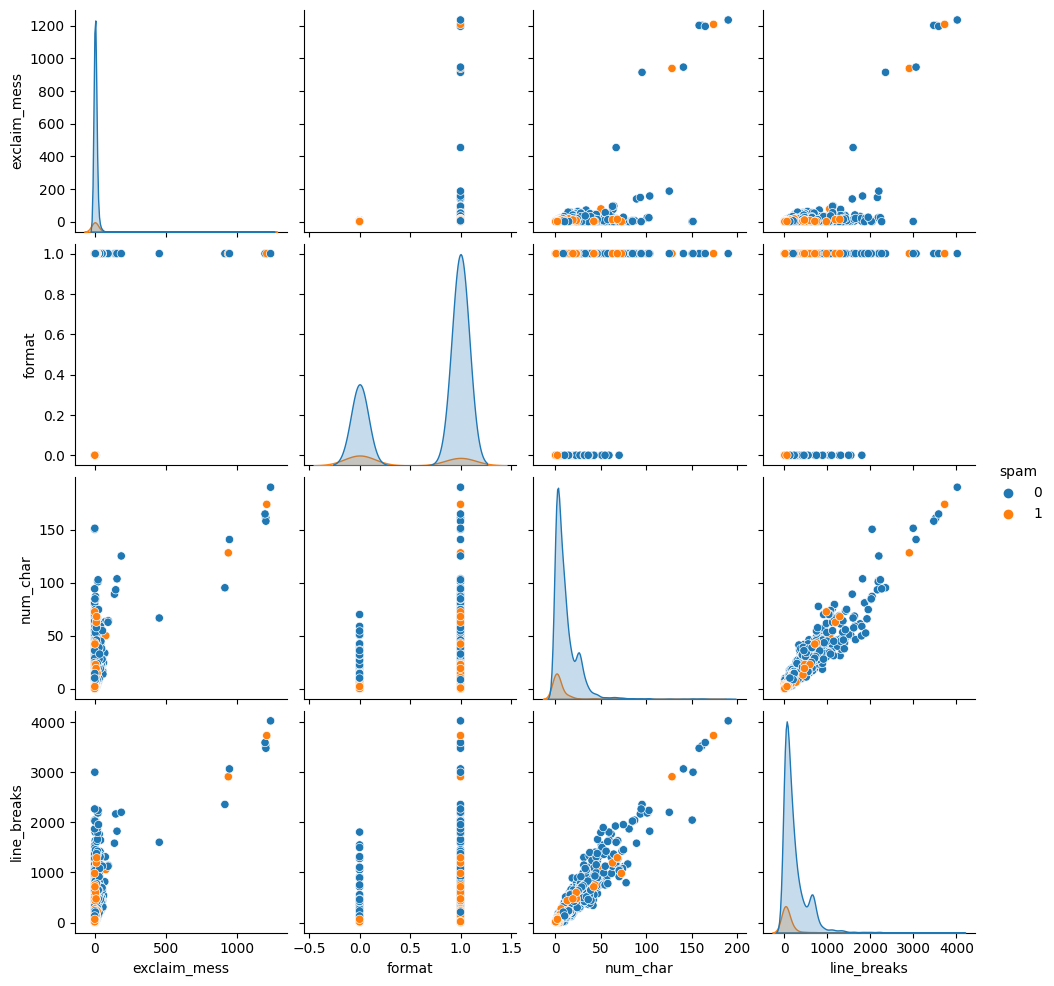

In [133]:
sns.pairplot(email, hue='spam')

## Model fitting

In [136]:
y = email_dc.spam
X = email_dc.drop('spam', axis=1)
m = LogisticRegression(fit_intercept = False).fit(X, y)

In [137]:
m.feature_names_in_

array(['exclaim_mess', 'format', 'num_char', 'line_breaks', 'number_big',
       'number_none', 'number_small'], dtype=object)

In [138]:
m.coef_

array([[ 0.00981634, -0.61898712,  0.05439923, -0.00555019, -1.21205887,
        -0.69343602, -1.92075489]])

## A quick comparison

```{r include=FALSE}
d = read.csv("data/email.csv")
d = dplyr::select(d, spam, exclaim_mess, format, num_char, line_breaks, number)
```


```{r}
glm(spam ~ . - 1, data = d, family=binomial) 
```

Why are these different?
--

> `sklearn.linear_model.LogisticRegression`
>
> ...
> 
> This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. **Note that regularization is applied by default.** It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

---

## Penalty parameter

🚩🚩🚩 `LogisticRegression()` has a parameter called penalty that applies a `l1` (lasso), `l2` (ridge), `elasticnet` or `none` with `l2` being the default. To make matters worse, the regularization is controled by the parameter `C` which defaults to 1 (not 0) - also `C` is the inverse regularization strength (e.g. different from `alpha` for ridge and lasso models). 🚩🚩🚩

$$
\min\_{w, c} \frac{1 - \rho}{2}w^T w + \rho \|w\|\_1 + C \sum\_{i=1}^n \log(\exp(- y\_i (X\_i^T w + c)) + 1),
$$

<br/>


In [140]:
m = LogisticRegression(fit_intercept = False, penalty=None).fit(X, y)
m.feature_names_in_

array(['exclaim_mess', 'format', 'num_char', 'line_breaks', 'number_big',
       'number_none', 'number_small'], dtype=object)

In [141]:
m.coef_

array([[ 0.00958699, -0.60486772,  0.0547748 , -0.00548093, -1.26464165,
        -0.70683896, -1.95045065]])

## Solver parameter

It is also possible specify the solver to use when fitting a logistic regression model, to complicate matters somewhat the choice of the algorithm depends on the penalty chosen: 

* `newton-cg` - [`l2`, `none`]
* `lbfgs` - [`l2`, `none`]
* `liblinear` - [`l1`, `l2`]
* `sag` - [`l2`, `none`]
* `saga` - [`elasticnet`, `l1`, `l2`, `none`]

Also the can be issues with feature scales for some of these solvers:
> **Note:** ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

---

## Prediction

Classification models have multiple prediction methods depending on what type of output you would like,

In [142]:
m.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
m.predict_proba(X)

array([[0.91324122, 0.08675878],
       [0.95595611, 0.04404389],
       [0.95788691, 0.04211309],
       ...,
       [0.95981655, 0.04018345],
       [0.89245364, 0.10754636],
       [0.89800487, 0.10199513]])

In [144]:
m.predict_log_proba(X)

array([[-0.09075522, -2.44462369],
       [-0.04504327, -3.12256873],
       [-0.04302555, -3.16739672],
       ...,
       [-0.04101311, -3.21430005],
       [-0.11378071, -2.22983324],
       [-0.10757979, -2.2828302 ]])

## Scoring

Classification models also include a `score()` method which returns the model's accuracy,

In [145]:
m.score(X, y)

0.90640142820709

Other scoring options are available via the [metrics](https://scikit-learn.org/stable/modules/classes.html#classification-metrics) submodule

In [146]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix

In [148]:
accuracy_score(y, m.predict(X))

0.90640142820709

In [149]:
roc_auc_score(y, m.predict_proba(X)[:,1])

0.7606952445645924

In [150]:
f1_score(y, m.predict(X))

0.0

In [151]:
confusion_matrix(y, m.predict(X), labels=m.classes_)

array([[3554,    0],
       [ 367,    0]])

## Scoring visualizations - confusion matrix

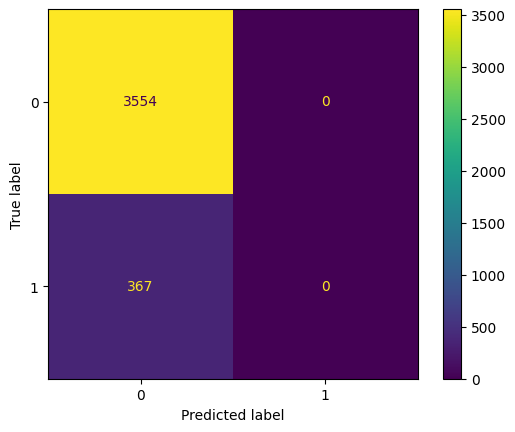

In [152]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y, m.predict(X), labels=m.classes_)
disp = ConfusionMatrixDisplay(cm).plot()
plt.show()

## Scoring visualizations - ROC curve

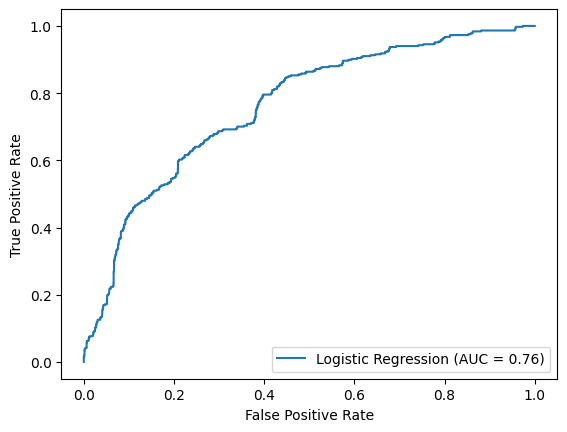

In [153]:
from sklearn.metrics import auc, roc_curve, RocCurveDisplay
fpr, tpr, thresholds = roc_curve(y, m.predict_proba(X)[:,1])
roc_auc = auc(fpr, tpr)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                       estimator_name='Logistic Regression').plot()
plt.show()

## Scoring visualizations - Precision Recall

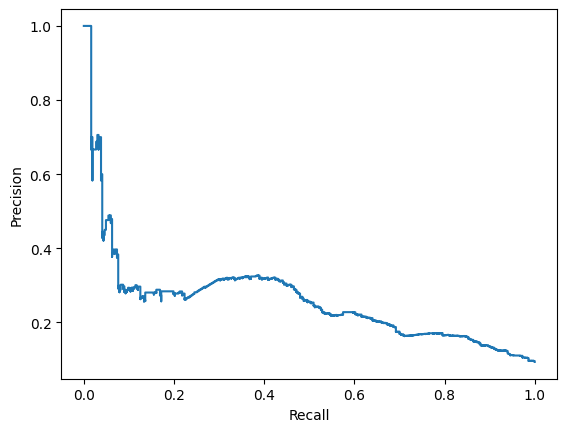

In [154]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
precision, recall, _ = precision_recall_curve(y, m.predict_proba(X)[:,1])
disp = PrecisionRecallDisplay(precision=precision, recall=recall).plot()
plt.show()

## Another visualization

In [271]:
def confusion_plot(truth, probs, threshold=0.5):
    d = pd.DataFrame(data = {'spam': y, 'truth': truth, 'probs': probs})
    
    # Create a column called outcome that contains the labeling outcome for the given threshold
    d['outcome'] = 'other'
    d.loc[(d.spam == 1) & (d.probs >= threshold), 'outcome'] = 'true positive'
    d.loc[(d.spam == 0) & (d.probs >= threshold), 'outcome'] = 'false positive'
    d.loc[(d.spam == 1) & (d.probs <  threshold), 'outcome'] = 'false negative'
    d.loc[(d.spam == 0) & (d.probs <  threshold), 'outcome'] = 'true negative'
    
    # Create plot and color according to outcome
    plt.figure(figsize=(12,4))
    plt.xlim((-0.05,1.05))
    sns.stripplot(y='truth', x='probs', hue='outcome', data=d, size=3, alpha=0.5)
    plt.axvline(x=threshold, linestyle='dashed', color='black', alpha=0.5)
    plt.title("threshold = %.2f" % threshold)
    plt.show()

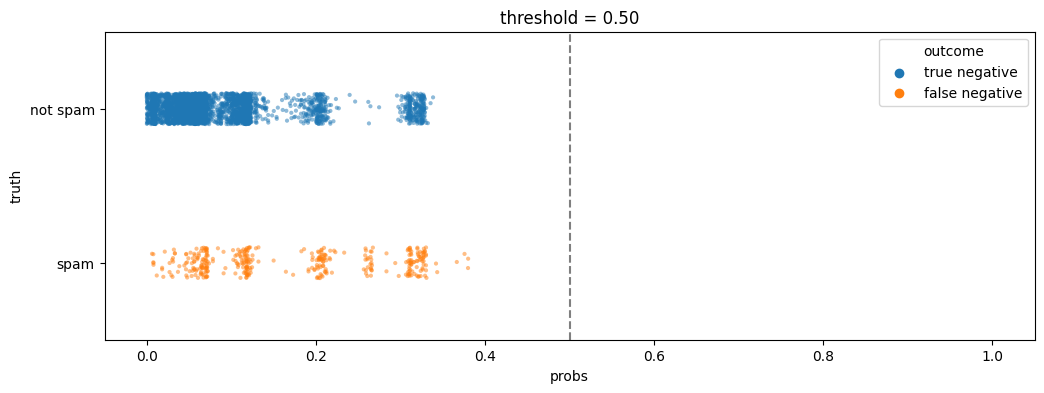

In [156]:
truth = pd.Categorical.from_codes(y, categories = ('not spam','spam'))
probs = m.predict_proba(X)[:,1]
confusion_plot(truth, probs, 0.5)

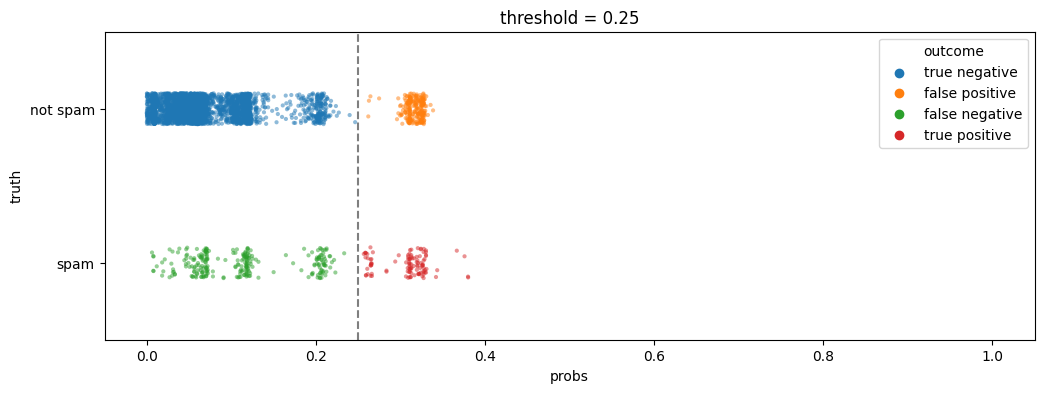

In [157]:
confusion_plot(truth, probs, 0.25)

## Demo 1 - DecisionTreeClassifier

## Demo 2 - SVC

---

## MNIST handwritten digits

In [158]:
from sklearn.datasets import load_digits
digits = load_digits(as_frame=True)

In [159]:
X = digits.data
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [160]:
y = digits.target
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int64

## digit description

In [272]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## Example digits

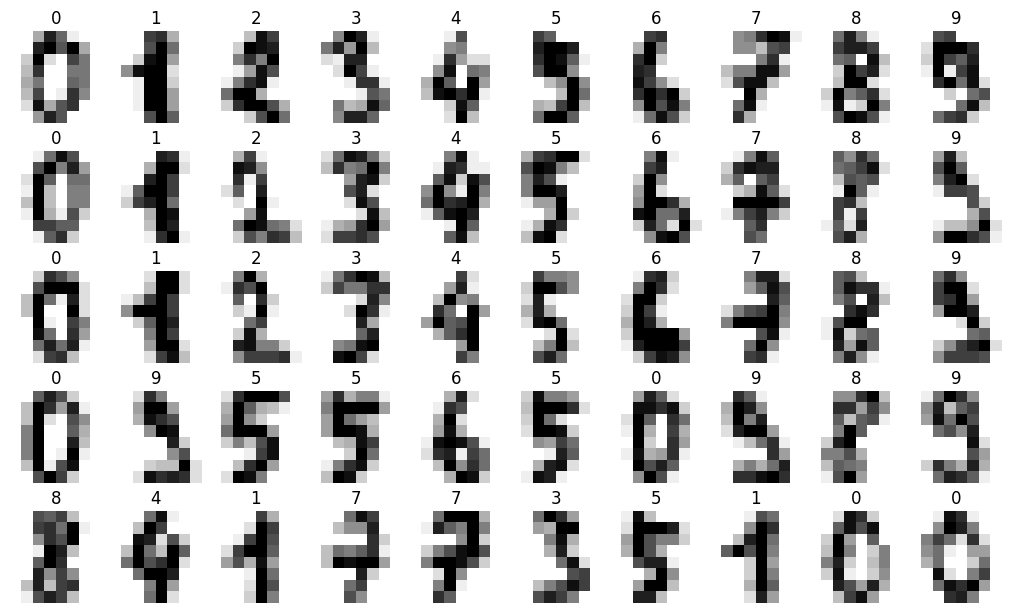

In [273]:
fig, axes = plt.subplots(nrows=5, ncols=10, figsize=(10, 6), layout="constrained")
axes2 = [ax for row in axes for ax in row]

for ax, image, label in zip(axes2, digits.images, digits.target):
    ax.set_axis_off()
    img = ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    txt = ax.set_title(f"{label}")
    
plt.show()

## Doing things properly - train/test split

To properly assess our modeling we will create a training and testing set of these data, only the training data will be used to learn model coefficients or hyperparameters, test data will only be used for final model scoring.

In [161]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=1234
)

## Multiclass logistic regression

Fitting a multiclass logistic regression model will involve selecting a value for the `multi_class` parameter, which can be either `multinomial` for multinomial regression or `ovr` for one-vs-rest where `k` binary models are fit.

In [163]:
mc_log_cv = GridSearchCV(
  LogisticRegression(penalty=None, max_iter = 5000),
  param_grid = {"multi_class": ["multinomial", "ovr"]},
  cv = KFold(10, shuffle=True, random_state=12345),
  n_jobs = 4
).fit(X_train, y_train)

In [164]:
mc_log_cv.best_estimator_

LogisticRegression(max_iter=5000, multi_class='multinomial', penalty=None)

In [165]:
mc_log_cv.best_score_

0.943477961432507

In [166]:
for p, s in  zip(mc_log_cv.cv_results_["params"], mc_log_cv.cv_results_["mean_test_score"]):
    print(p,"Score:",s)

{'multi_class': 'multinomial'} Score: 0.943477961432507
{'multi_class': 'ovr'} Score: 0.8927617079889807


## Model coefficients

In [168]:
pd.DataFrame(mc_log_cv.best_estimator_.coef_)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.133584,-0.823611,0.904385,0.163397,-2.162872,-1.298188,-0.096075,-0.001258,-0.660369,...,-0.636252,-0.176647,-0.000284,-0.102450,-0.852330,1.211092,-0.444343,-1.660396,-0.750159,-0.184264
1,0.0,-0.184931,-1.259550,1.453983,-5.091361,2.095657,-0.454699,-0.139664,-0.001417,-1.602060,...,-1.872495,1.224008,-0.014499,-0.119968,-1.835086,-0.792356,0.384498,2.617778,1.265903,2.338324
2,0.0,0.118104,0.569190,0.798171,0.943558,-0.826557,-0.693925,-0.044530,0.007015,1.606162,...,1.789297,0.554077,0.027062,0.213249,0.683567,0.281622,0.829968,2.602947,2.481998,0.788003
3,0.0,0.239612,-0.381815,0.393986,3.886781,1.614048,0.504827,-0.057710,0.001294,0.673735,...,3.335642,-0.546307,-0.000289,0.416810,2.069857,1.231868,0.439466,1.070662,0.583209,-1.027194
4,0.0,-0.109904,-1.160712,-2.175923,-2.580281,-2.603167,-1.585730,0.702025,-0.001200,-0.272493,...,-1.352939,-0.060797,-0.000301,-0.211872,-1.045235,-0.937843,-1.710608,-0.651175,-0.656791,-0.097263
5,0.0,0.701265,4.241974,-0.738130,0.057049,2.589164,2.391813,-0.393430,0.002072,0.245216,...,-2.072950,-0.073013,-0.000248,0.526295,3.616287,2.045636,-0.001139,-1.412535,-2.097753,-0.210256
6,0.0,-0.103487,-1.454058,-1.310946,-0.400937,-1.944514,-0.471304,-0.042640,-0.001290,-1.246434,...,0.877755,-0.791187,-0.000242,-0.090647,-1.490336,-1.407609,0.249136,2.466801,1.005207,-0.624921
7,0.0,0.088562,1.386086,1.198007,0.467463,0.783439,2.051848,0.481185,-0.001183,0.557684,...,-1.152689,-0.061566,-0.000496,-0.235133,0.622827,-2.710461,-3.176521,-2.635078,-0.710317,-0.099948
8,0.0,-0.347408,-0.306168,-1.933009,1.074249,0.527941,-2.095571,-0.114669,-0.001877,-0.430877,...,1.243915,-0.198290,-0.010450,-0.099032,-2.496510,0.872821,1.722070,-2.302814,-1.602654,-0.679128
9,0.0,-0.268228,-0.811336,1.409475,1.480082,-0.073138,1.650928,-0.294492,-0.002156,1.129436,...,-0.159283,0.129723,-0.000253,-0.297251,0.726959,0.205230,1.707472,-0.096190,0.481356,-0.203353


In [169]:
mc_log_cv.best_estimator_.coef_.shape

(10, 64)

In [170]:
mc_log_cv.best_estimator_.intercept_

array([ 0.01605716, -0.11465689, -0.00534538,  0.08555034,  0.10435984,
       -0.01811373, -0.0094508 ,  0.05044148, -0.01356627, -0.09527577])

## Confusion Matrix

In [172]:
#Compute the accuracy within sample 
accuracy_score(y_train, mc_log_cv.best_estimator_.predict(X_train))

1.0

In [173]:
confusion_matrix(y_train, mc_log_cv.best_estimator_.predict(X_train))

array([[125,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 118,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 119,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 123,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 110,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 114,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 124,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 124,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 119,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 127]])

In [174]:
accuracy_score(y_test, mc_log_cv.best_estimator_.predict(X_test))

0.9579124579124579

In [175]:
confusion_matrix(y_test, mc_log_cv.best_estimator_.predict(X_test),labels = digits.target_names)

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 64,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2, 56,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 58,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 69,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  1,  1, 64,  2,  0,  0,  0],
       [ 1,  1,  0,  0,  0,  0, 55,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0, 53,  0,  0],
       [ 0,  5,  2,  0,  0,  0,  0,  0, 46,  2],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 51]])

## Report

In [178]:
print( classification_report(y_test, mc_log_cv.best_estimator_.predict(X_test)) )

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        53
           1       0.89      1.00      0.94        64
           2       0.95      0.97      0.96        58
           3       0.98      0.97      0.97        60
           4       0.96      0.97      0.97        71
           5       0.97      0.94      0.96        68
           6       0.96      0.96      0.96        57
           7       1.00      0.96      0.98        55
           8       0.96      0.84      0.89        55
           9       0.96      0.96      0.96        53

    accuracy                           0.96       594
   macro avg       0.96      0.96      0.96       594
weighted avg       0.96      0.96      0.96       594



## ROC & AUC?

These metrics are slightly awkward to use in the case multiclass problems since they depend on the probability predictions to calculate.

In [179]:
roc_auc_score(y_test, mc_log_cv.best_estimator_.predict_proba(X_test))

ValueError: multi_class must be in ('ovo', 'ovr')

In [180]:
roc_auc_score(
  y_test, mc_log_cv.best_estimator_.predict_proba(X_test),
  multi_class = "ovr"
)

0.9979624274858663

In [181]:
roc_auc_score(
  y_test, mc_log_cv.best_estimator_.predict_proba(X_test),
  multi_class = "ovr", average = "weighted"
)

0.9979869175119241

In [182]:
roc_auc_score(
  y_test, mc_log_cv.best_estimator_.predict_proba(X_test),
  multi_class = "ovo"
)

0.9979645359400721

In [183]:
roc_auc_score(
  y_test, mc_log_cv.best_estimator_.predict_proba(X_test),
  multi_class = "ovo", average = "weighted"
)

0.9979743498851119

## Prediction

In [185]:
mc_log_cv.best_estimator_.predict(X_test)

array([7, 1, 7, 6, 0, 2, 4, 3, 6, 3, 7, 8, 7, 9, 4, 3, 1, 7, 8, 4, 0, 3,
       9, 1, 3, 6, 6, 0, 5, 4, 1, 2, 1, 2, 3, 2, 7, 6, 4, 8, 6, 4, 4, 0,
       9, 1, 9, 5, 4, 4, 4, 1, 7, 6, 9, 2, 9, 9, 9, 0, 8, 3, 1, 8, 8, 1,
       3, 9, 1, 3, 9, 6, 9, 5, 2, 1, 9, 2, 1, 3, 8, 7, 3, 3, 2, 7, 7, 5,
       8, 2, 6, 1, 9, 1, 6, 4, 5, 2, 2, 4, 5, 4, 4, 6, 5, 9, 2, 4, 1, 0,
       7, 6, 1, 2, 9, 5, 2, 5, 0, 3, 2, 7, 6, 4, 8, 2, 1, 1, 6, 4, 6, 2,
       3, 4, 7, 5, 0, 9, 1, 0, 5, 6, 7, 6, 3, 8, 3, 2, 0, 4, 0, 1, 5, 4,
       6, 1, 1, 1, 6, 1, 7, 9, 0, 7, 9, 5, 4, 1, 3, 8, 6, 4, 7, 1, 5, 7,
       4, 7, 4, 5, 2, 2, 1, 1, 4, 4, 3, 5, 6, 9, 4, 5, 5, 9, 3, 9, 3, 1,
       2, 0, 8, 2, 8, 5, 2, 4, 6, 8, 3, 9, 1, 0, 8, 1, 8, 5, 6, 8, 7, 1,
       8, 2, 4, 9, 7, 0, 5, 5, 6, 1, 3, 0, 5, 8, 2, 0, 9, 8, 6, 7, 8, 4,
       1, 0, 5, 2, 5, 1, 6, 4, 7, 1, 2, 6, 4, 4, 6, 3, 2, 3, 2, 6, 5, 2,
       9, 4, 7, 0, 1, 0, 4, 3, 1, 2, 7, 9, 8, 5, 9, 5, 7, 0, 4, 8, 4, 9,
       4, 0, 7, 7, 2, 5, 3, 5, 3, 9, 7, 5, 5, 2, 7,

In [186]:
mc_log_cv.best_estimator_.predict_proba(X_test),

(array([[1.23076161e-137, 6.91056423e-081, 5.93782336e-084, ...,
         1.00000000e+000, 1.73370779e-107, 3.10182206e-110],
        [7.52042858e-093, 1.00000000e+000, 2.71415754e-134, ...,
         3.90984780e-065, 8.14395834e-058, 3.95043432e-024],
        [2.60614421e-129, 5.34045504e-100, 7.49374546e-071, ...,
         1.00000000e+000, 8.43774532e-085, 2.45874524e-098],
        ...,
        [1.00000000e+000, 6.16409939e-118, 2.08331366e-117, ...,
         1.30536710e-080, 1.66938249e-069, 2.68073496e-072],
        [1.27472007e-066, 9.22402201e-076, 8.41815021e-204, ...,
         4.09723241e-069, 1.97533998e-069, 4.13589169e-035],
        [3.10726419e-098, 1.05658017e-052, 1.17580451e-082, ...,
         1.00000000e+000, 1.53183259e-036, 4.96341951e-058]]),)

## Exercise 1
## Exercise 1

Using these data fit a `DecisionTreeClassifier` to these data, you should employ `GridSearchCV` to tune some of the parameters (`max_depth` at a minimum) - see the full list [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

Does this model perform better or worse than the multinomial regression model we just used?


In [275]:
from sklearn.datasets import load_digits
digits = load_digits(as_frame=True)
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=1234
)

## Examining the coefs

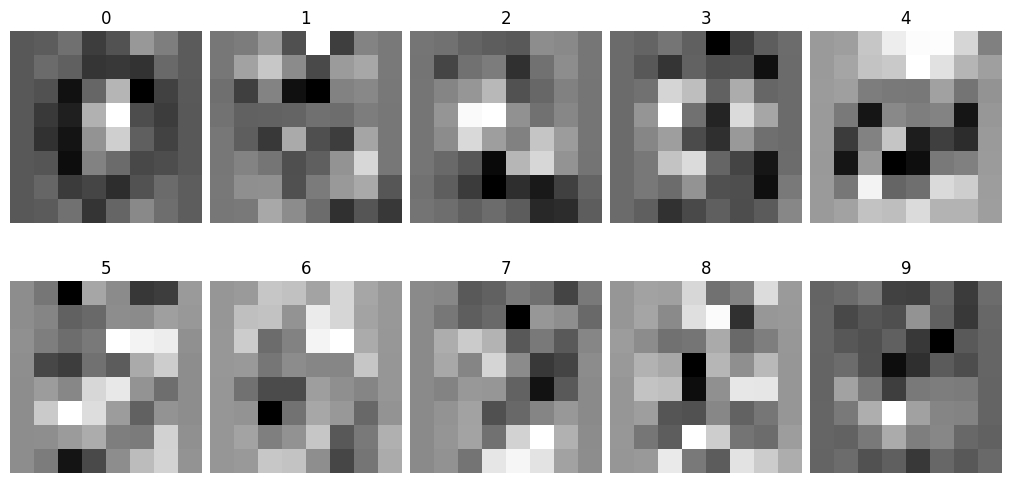

In [276]:
coef_img = mc_log_cv.best_estimator_.coef_.reshape(10,8,8)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5), layout="constrained")
axes2 = [ax for row in axes for ax in row]
for ax, image, label in zip(axes2, coef_img, range(10)):
    ax.set_axis_off()
    img = ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    txt = ax.set_title(f"{label}")
plt.show()

## End Notbook.